In [73]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
def preprocess_csv(file_path):
    # Read the CSV file into a pandas dataframe
    df = pd.read_csv(file_path)
    
    # Handling missing values
    # Replace any missing values (NaN) with appropriate strategies
    # For numerical columns, you can use methods like mean, median, or interpolation
    df.fillna(df.mean(), inplace=True)  # Example: Replace missing values with column means
    
    # For categorical columns, you can use methods like mode or a constant value
    df.fillna('Unknown', inplace=True)  # Example: Replace missing values with 'Unknown'
    
    # Process or remodel the description columns
    # Depending on your specific use case, you can apply techniques like text preprocessing, feature extraction, or encoding
    
    # Text preprocessing: Remove special characters, convert to lowercase, etc.
    #df['description'] = df['description'].str.replace('[^\w\s]', '').str.lower()
    
    # Feature extraction: Extract relevant information from the description
    # You can use techniques like TF-IDF, word embeddings, or topic modeling to extract features
    
    # Encoding: Convert categorical description columns into numeric representations
    # Techniques like one-hot encoding or word embeddings can be useful
    
    # Return the preprocessed dataframe
    return df


In [17]:
def learnLanguage(file, doc2vec):
    
    
    data = pd.read_csv(file)
    X = pd.read_csv(doc2vec, index_col = False, delimiter = ',', header = None)
    y = data["Language"]
    
    y = pd.Series(y)
    # Assuming you have a feature matrix `X` and a target variable `y`
    # X should contain other features like doc2vec and word frequency counts
    # y should contain the language labels (with missing values)

    # Split the dataset into instances with and without missing language values
    X_with_language = X[~y.isnull()]
    y_with_language = y[~y.isnull()]
    X_missing_language = X[y.isnull()]

    # Split the dataset with language into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_with_language, y_with_language, test_size=0.2, random_state=42)

    # Train a Random Forest classifier on the instances with language
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)

    # Predict the missing language values using the trained model
    imputed_language = rf.predict(X_missing_language)

    # Merge the imputed language values with the original dataset
    y[y.isnull()] = imputed_language

    # Now you can proceed with your machine learning algorithm using the complete dataset
    return y

In [106]:
# Load the dataset
train_df = pd.read_csv('project_data_files/book_rating_train.csv')
test_df = pd.read_csv('project_data_files/book_rating_test.csv')

# Add the predicted languages to each entry
lang = learnLanguage('project_data_files/book_rating_train.csv', "project_data_files/book_text_features_doc2vec/train_desc_doc2vec100.csv")
train_df['Language'] = lang

In [107]:
def add_letter_to_cols(df, letter):
    for column in df.columns:
        new_name = letter + str(column)
        df.rename(columns={column: new_name}, inplace=True)

In [108]:
train_df = train_df.drop('Name', axis=1)
train_df = train_df.drop('Description', axis=1)
train_df = train_df.drop('Authors', axis=1)


# Remove the title, description and replace with doc2vec
book_name_features = pd.read_csv(r"project_data_files/book_text_features_doc2vec/train_name_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
add_letter_to_cols(book_name_features, "n")

book_desc_features = pd.read_csv(r"project_data_files/book_text_features_doc2vec/train_desc_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
add_letter_to_cols(book_desc_features, "d")

book_auth_features = pd.read_csv(r"project_data_files/book_text_features_doc2vec/train_authors_doc2vec20.csv", index_col = False, delimiter = ',', header=None)
add_letter_to_cols(book_auth_features, "a")

combined_df = pd.concat([train_df, book_name_features, book_desc_features, book_auth_features], axis=1)

In [115]:
# Function that converts a categorical feature into nominal, while maintaing categorical properties
def numericise_categorical_data(df, feature):
    df[feature] = df[feature].astype(str)
    df[feature] = df[feature].astype('category')
    df_encoded = pd.get_dummies(df, columns=[feature])
    
    encoder = LabelEncoder()
    df[feature] = encoder.fit_transform(df[feature])

In [127]:
# Perform label encoding for publishers, language
label_encoder = LabelEncoder()
#combined_df['Publisher'] = label_encoder.fit_transform(combined_df['Publisher'])
#combined_df['Language'] = label_encoder.fit_transform(combined_df['Language'])
#numericise_categorical_data(combined_df, 'Publisher')
#numericise_categorical_data(combined_df, 'Language')

#combined_df = pd.concat([book_name_features, book_desc_features, train_df['rating_label']], axis=1)
# Separate the feature columns (X) and the target column (y)
X = combined_df.copy()
X = pd.get_dummies(X, columns=['Language'])
X = X.drop('rating_label', axis=1)
X = X.drop('Publisher', axis=1)
y = combined_df['rating_label']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train

,PublishYear,PublishMonth,PublishDay,pagesNumber,n0,n1,n2,n3,n4,n5,...,Language_8,Language_9,Language_10,Language_11,Language_12,Language_13,Language_14,Language_15,Language_16,Language_17
15793,2007,1,1,300,-0.235054,0.037605,-0.014295,0.095417,0.051042,-0.178790,...,0,0,0,0,0,0,0,0,0,0
8470,1988,4,15,252,-0.047620,0.164821,0.045588,0.115583,0.021429,-0.185763,...,0,0,0,0,0,0,0,0,0,0
16792,2001,9,11,368,0.025241,0.057906,0.207093,0.035697,-0.100838,-0.109616,...,0,0,0,0,0,0,0,0,0,0
16080,2003,5,19,32,-0.002664,-0.039127,0.059236,-0.077508,0.014086,-0.041553,...,0,0,0,0,0,0,0,0,0,0
6178,2001,6,25,184,0.047839,0.130699,0.077889,-0.051670,0.121633,0.083518,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,2003,7,1,177,-0.259447,0.395947,0.169967,0.221198,0.003115,0.003376,...,0,0,0,0,0,0,0,0,0,0
21575,2003,4,1,424,-0.081556,0.017351,0.079508,0.062931,0.098779,-0.286745,...,0,0,0,0,0,0,0,0,0,0
5390,2004,1,23,256,-0.011543,-0.003987,-0.159790,-0.132089,0.100838,-0.029381,...,0,0,0,0,0,0,0,0,0,0
860,2002,9,5,374,-0.257324,0.083625,0.098087,0.146185,-0.033267,-0.028318,...,0,0,0,0,0,0,0,0,0,0


In [129]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [130]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7063583815028902


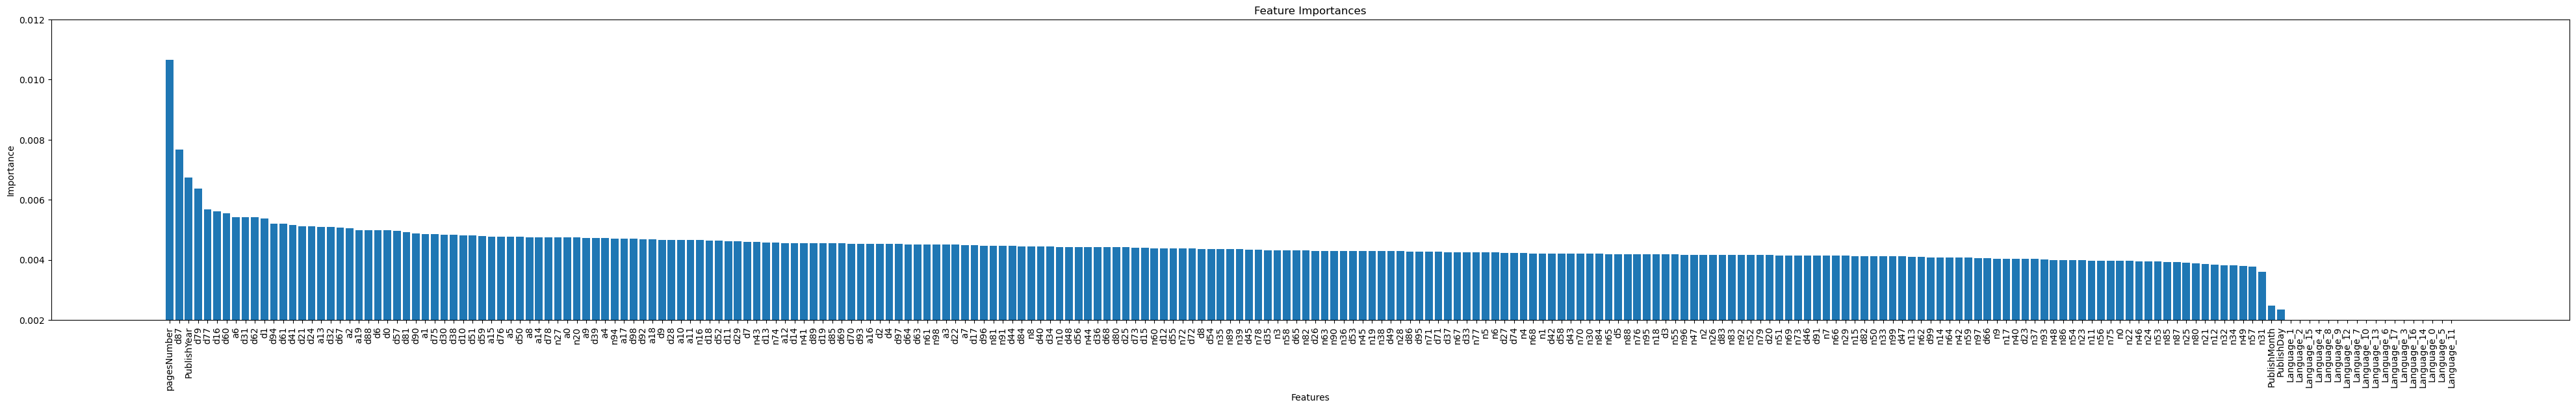

In [131]:
feature_importances = rf.feature_importances_

# Assuming you have trained a random forest model 'rf' and have a pandas DataFrame 'df'
feature_importances = rf.feature_importances_
feature_names = X_train.columns.tolist()

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = np.array(feature_names)[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(50, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances)
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.ylim(0.002, 0.012)
plt.show()

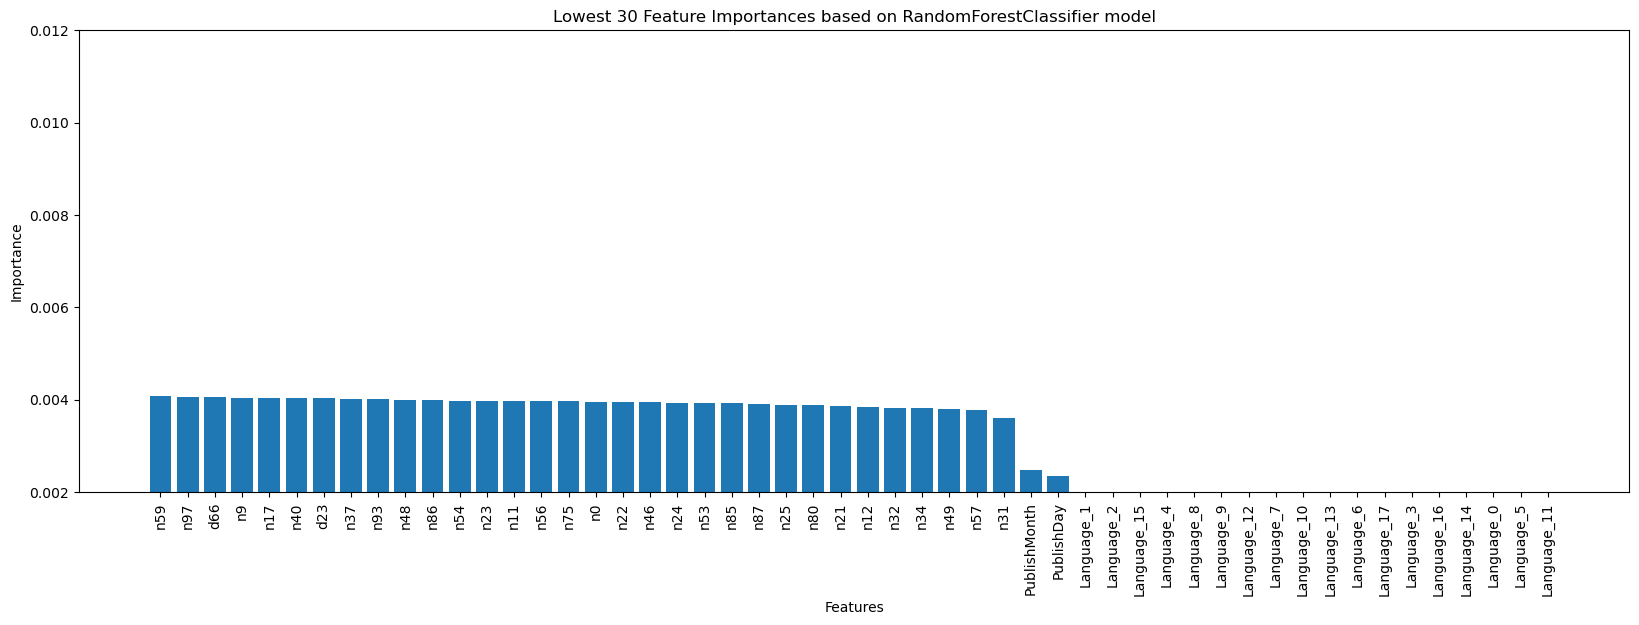

In [132]:
# Select only the top 20 features
top_feature_importances = sorted_feature_importances[190:]
top_feature_names = sorted_feature_names[190:]

# Plot the feature importances for the top 20 features
plt.figure(figsize=(20, 6))
plt.bar(range(len(top_feature_importances)), top_feature_importances)
plt.xticks(range(len(top_feature_importances)), top_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Lowest 30 Feature Importances based on RandomForestClassifier model')

plt.ylim(0.002, 0.012)
plt.show()

In [151]:
def lassoFeatures(data):
    
    target = data.pop("rating_label")

    # Assuming your features are stored in a pandas DataFrame called 'data'
    # and your target variable is stored in a pandas Series called 'target'

    # Split the data into training, validation, and testing sets
    X_train, X_val, y_train, y_val = train_test_split(data, target, test_size=0.2, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

    # Initialize a list to store the performance metrics
    mse_scores = []

    # Define a range of alpha values to try
    alpha_values = [0.05, 0.01, 0.3, 0.5, 0.8, 1.0, 1.5, 10]

    # Iterate over the alpha values
    for alpha in alpha_values:
        # Initialize and fit the Lasso model
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, y_train)

        # Predict on the validation set
        y_pred = lasso.predict(X_val)

        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_val, y_pred)
        mse_scores.append(mse)

    # Find the alpha value with the lowest MSE
    best_alpha = alpha_values[mse_scores.index(min(mse_scores))]
    # Train the final model with the best alpha value on the combined training and validation sets
    X_train_val = pd.concat([X_train, X_val])
    y_train_val = pd.concat([y_train, y_val])

    lasso = Lasso(alpha=best_alpha)
    print(best_alpha)
    lasso.fit(X_train_val, y_train_val)

    # Get the coefficients
    lasso_coef = lasso.coef_

    # Print the feature importances
    for feature, coef in zip(data.columns, lasso_coef):
        print(f"{feature}: {coef}")
        
    
    return lasso_coef

In [155]:
def trimFeatures(data, k = 20):
    
    #k is how many features to select
    
    lasso_coef = lassoFeatures(data)
    
    # Getting magnitudes of coefficients, ranking them
    
    lasso_coef_abs = abs(lasso_coef)
    feature_ranking = sorted(range(len(lasso_coef_abs)), key=lambda k: lasso_coef_abs[k], reverse=True)
    
    
    #selecting most influential features, returning as list of names
    selected_features = data.columns[feature_ranking[:k]]
    
    return selected_features



In [156]:
from sklearn.preprocessing import StandardScaler

combined_df = pd.concat([X,y], axis=1)
# Create an instance of the StandardScaler
scaler = StandardScaler()

# Standardize the dataframe
standardized_df = pd.DataFrame(scaler.fit_transform(combined_df), columns=combined_df.columns)


In [157]:
print(trimFeatures(standardized_df))

0.01
PublishYear: -0.030083958017207854
PublishMonth: -0.0
PublishDay: -0.005170616032222572
pagesNumber: 0.005820207780726182
n0: -0.0
n1: 0.0
n2: -0.00011148388556649587
n3: 0.0
n4: 0.0018036330826120496
n5: -0.0
n6: -0.0
n7: -0.0
n8: -0.008886737489086253
n9: 0.000984201403454413
n10: -0.0
n11: -0.013512350886432729
n12: 0.0
n13: -0.0
n14: -0.0
n15: 0.0
n16: 0.00786224749390538
n17: 0.0
n18: -0.0
n19: -0.0
n20: -0.0033686104480071567
n21: -0.0
n22: 0.0
n23: 0.0
n24: 0.0035585727419451168
n25: 0.0
n26: -0.010703843131190343
n27: 0.017954401413327426
n28: 0.00297374876877176
n29: -0.0
n30: 0.0
n31: -0.0
n32: 0.0
n33: 0.0
n34: 0.0
n35: 0.0
n36: 0.0
n37: -0.0
n38: 0.013350529286619447
n39: -0.0
n40: -0.0
n41: 0.016599622884347097
n42: 0.010183747151803153
n43: -0.0
n44: -0.0
n45: 0.0
n46: -0.004057686928579544
n47: 0.0
n48: -0.01504571414237067
n49: 0.0
n50: -0.0
n51: -0.0
n52: 0.0039445115339218064
n53: -0.0
n54: -0.001949132260135735
n55: -0.0
n56: -0.0008190562740881738
n57: -0.00677

In [137]:
# Load your dataset into a pandas DataFrame

# Select the continuous features you want to discretize
continuous_features = list(combined_df.drop('rating_label', axis=1).columns)

# Discretize the continuous features using equal width binning
n_bins = 5  # Number of bins
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
discretized_data = discretizer.fit_transform(combined_df[continuous_features])

# Create a new DataFrame with discretized features
df_discretized = pd.DataFrame(discretized_data, columns=continuous_features)

# Perform feature selection using mutual information
target_variable = 'rating_label'  # Your target variable
X = df_discretized  # Features
y = combined_df[target_variable]  # Target variable

selector = SelectKBest(score_func=mutual_info_classif, k='all')
selected_features = selector.fit_transform(X, y)
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = [X.columns[idx] for idx in selected_feature_indices]
selected_feature_scores = selector.scores_[selected_feature_indices]

# Sort features by score in descending order
sorted_features = sorted(zip(selected_feature_names, selected_feature_scores),
                         key=lambda x: x[1], reverse=True)

# Print the selected feature names and their mutual information scores in order
print("Selected Features and Mutual Information Scores (in descending order):")
for feature, score in sorted_features:
    print(f"{feature}: {score}")


Selected Features and Mutual Information Scores (in descending order):
d32: 0.009992845631927816
d72: 0.00993203734073611
d47: 0.009626218713665757
n42: 0.00954265034116153
n60: 0.009354211308135296
d87: 0.008656024475358404
d81: 0.0083089525542559
d62: 0.007983837820609185
d17: 0.00788189199708711
n61: 0.007816051945695346
d29: 0.007518362621896868
d41: 0.007503958855710646
d19: 0.00741048185130877
d96: 0.007382479768959449
n19: 0.00722273303404064
n92: 0.0069306149584664745
n3: 0.006859098963307719
d7: 0.006623544850811847
d77: 0.006507057071615918
d90: 0.006469653708254697
n64: 0.006461337987958338
n40: 0.006394633200924149
a10: 0.006366800871990819
d71: 0.006277447578951767
n90: 0.006217037952644722
d24: 0.006203861719032533
n94: 0.00601504287979493
d89: 0.005932104652444314
n24: 0.005922263215912604
n29: 0.005873700664289716
d75: 0.005774071571794659
d44: 0.005765847935271573
d15: 0.005746664641120169
n95: 0.005541508023489516
d0: 0.005450992106807773
n48: 0.005443299403370849
n34

In [139]:
# Calculate averages for each letter-group
averages = {}
for feature, score in sorted_features:
    letter_group = feature[0]  # Get the first character of the feature name
    if letter_group in ["n","d","a", "L"]:
        if letter_group not in averages:
            averages[letter_group] = []
        averages[letter_group].append(score)

# Compute the average for each letter-group
for letter_group, scores in averages.items():
    average_score = sum(scores) / len(scores)
    print(f"Average score for {letter_group}-features: {average_score}")

Average score for d-features: 0.0030883479353575162
Average score for n-features: 0.0025730543192252586
Average score for a-features: 0.0013800498333301214
Average score for L-features: 0.0008116686544070347
